<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
# Step 1: Import the required libraries
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 2: Read the dataset from the provided URL
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

# Load the data into a DataFrame
boston_df = pd.read_csv(boston_url)

# Display the first few rows of the dataset
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


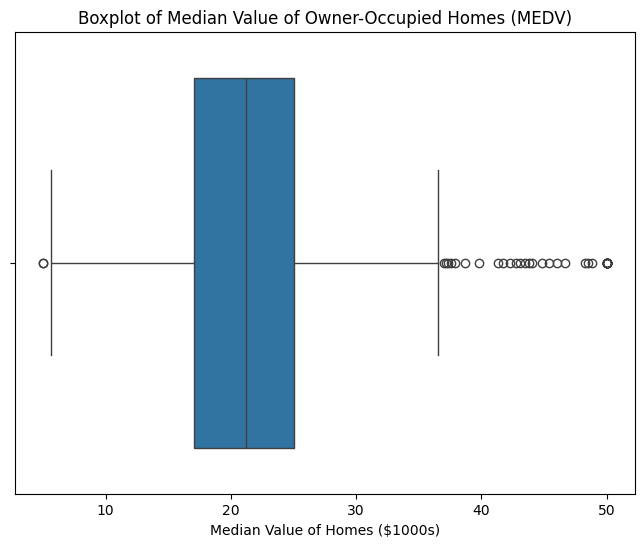

In [10]:
# Boxplot for the Median Value of owner-occupied homes (MEDV)
plt.figure(figsize=(8,6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Homes ($1000s)')
plt.show()


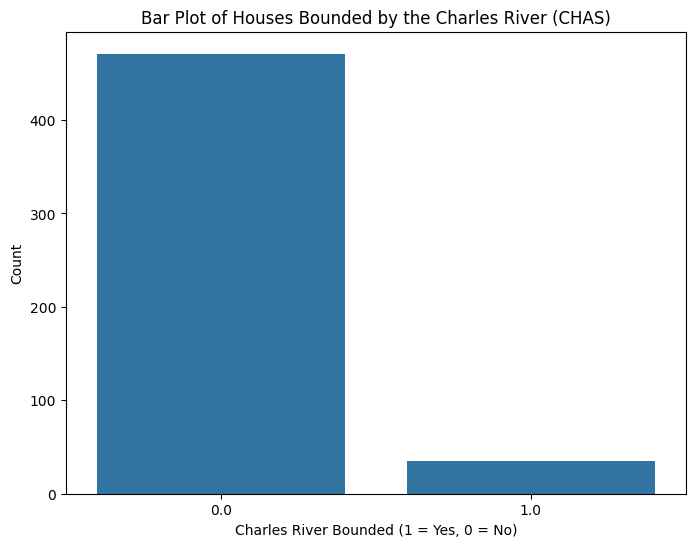

In [11]:
# Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(8,6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Houses Bounded by the Charles River (CHAS)')
plt.xlabel('Charles River Bounded (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


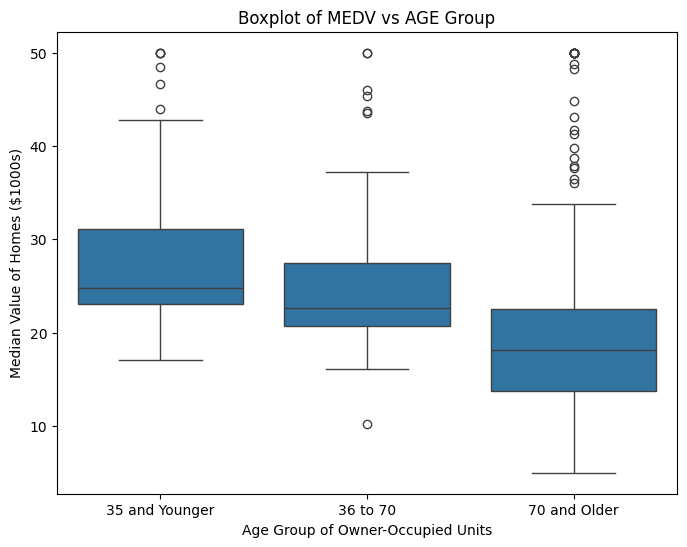

In [12]:
# Discretizing AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 and Younger', '36 to 70', '70 and Older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs discretized AGE
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group of Owner-Occupied Units')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()


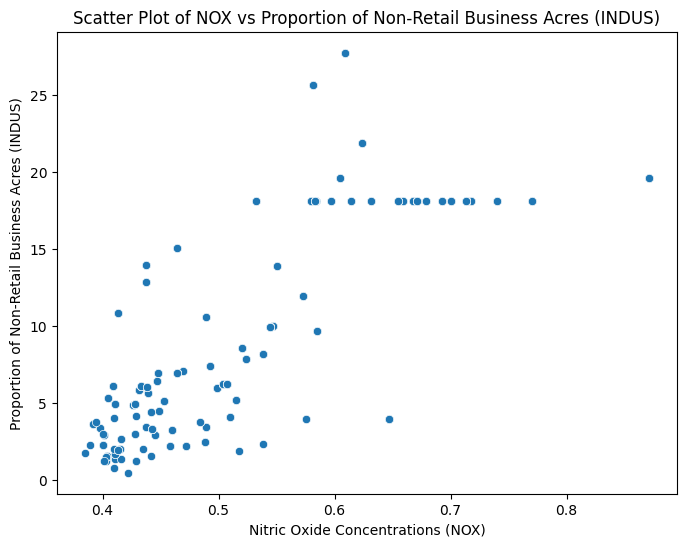

In [13]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of NOX vs Proportion of Non-Retail Business Acres (INDUS)')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


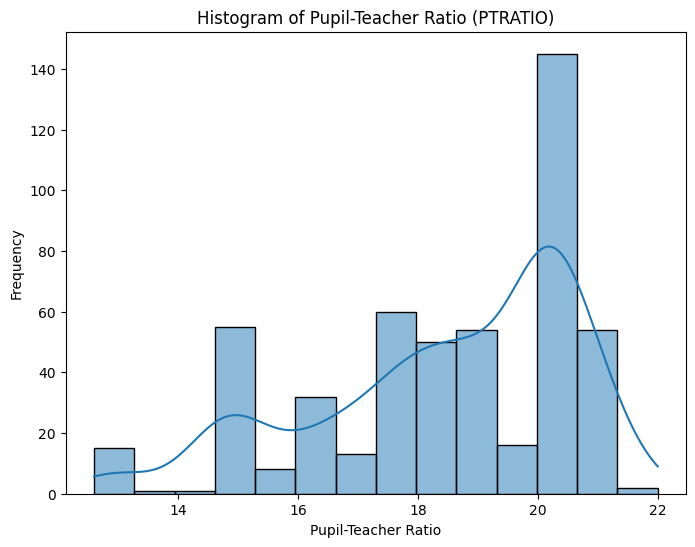

In [14]:
# Histogram for PTRATIO
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [15]:
# T-test for independent samples (CHAS vs MEDV)
from scipy import stats

# Separate data by CHAS
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Hypothesis testing conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: Significant difference in median values.


In [16]:
# ANOVA for MEDV and AGE_group
from scipy import stats

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_group'] == '35 and Younger']['MEDV'],
    boston_df[boston_df['AGE_group'] == '36 to 70']['MEDV'],
    boston_df[boston_df['AGE_group'] == '70 and Older']['MEDV']
)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Hypothesis testing conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in MEDV between AGE groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV.")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis: Significant difference in MEDV between AGE groups.


In [17]:
# Pearson Correlation for NOX and INDUS
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

# Hypothesis testing conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


Pearson Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis: Significant correlation between NOX and INDUS.


In [18]:
# Linear regression for DIS vs MEDV
import statsmodels.api as sm

# Define the independent and dependent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        18:08:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0